# About

Script to generate plots regarding the stability around the incoherent state, with the single delay and exponential delay case.
Refer to 'sec3_incoherent_exp.mat' for the script to import data on the exponential delay case.

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Directories

In [2]:
# Data files from Matlab
import_folder = 'sec3_incoherent'

# Directory
dir_main = os.getcwd()
dir_im = os.path.join(dir_main, 'matlab', 'data', import_folder)
dir_file = os.path.join(dir_im, 'incoherent_exp.mat')

# Single-delay arrays

In [3]:
# Parameters
w0 = 1.0

# Arrays
tau0_arr = np.array([])
g_arr = np.array([])

k_list = np.arange(0, 4, 1)
num_steps = 500

for k in k_list:
    L_k = (4*k + 1)*pi / 2
    M_k = (2*k+1)*pi
    U_k = (4*k + 3)*pi / 2
    tau0_arrk1 = np.linspace(L_k, M_k, num=num_steps) / w0
    tau0_arrk2 = np.linspace(M_k, U_k, num=num_steps) / w0
    
    g_arrk1 = w0 - L_k / tau0_arrk1
    g_arrk2 = U_k / tau0_arrk2 - w0
    
    tau0_arr = np.concatenate((tau0_arr, tau0_arrk1, tau0_arrk2))
    g_arr = np.concatenate((g_arr, g_arrk1, g_arrk2))

# Exponential-delay arrays

In [4]:
dict_mat = sio.loadmat(dir_file)

# Arrays
taum_arr = np.reshape(dict_mat['taum'], -1)
re_min_arr = np.reshape(dict_mat['min_real'], -1)
re_max_arr = np.reshape(dict_mat['max_real'], -1)

slog = lambda z: np.sign(z)*np.log10(1 + np.abs(z))

# Options

In [5]:
# Plot positions [left, bottom, width, height]
bbox0 = [0.1, 0.1, 0.4, 0.9] # Left (Asy. Omega heat map)
bbox1 = [0.6, 0.1, 0.4, 0.9] # Right (Asy. Omega colour legend)

# Figure

(-0.488988988988989, 9.98998998998999)

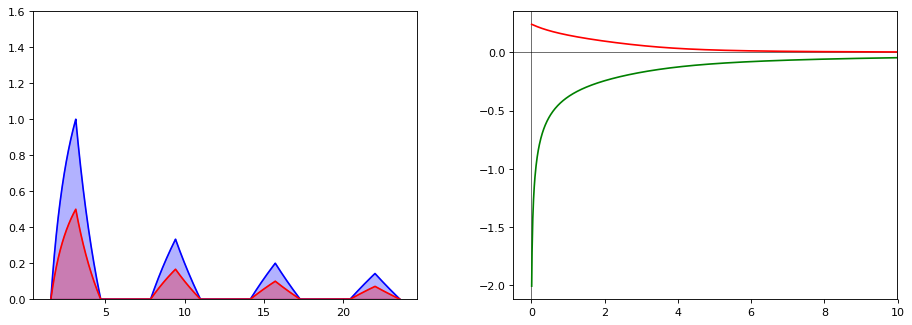

In [6]:
fig, ax = plt.subplots(2, figsize=(12,4), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)

# Plot
ax[0].plot(tau0_arr, 2*g_arr, color='blue')
ax[0].plot(tau0_arr, g_arr, color='red')

ax[1].plot(taum_arr, slog(re_min_arr), color='green')
ax[1].plot(taum_arr, slog(re_max_arr), color='red')

# Fill
ax[0].fill(tau0_arr, 2*g_arr, color='blue', alpha=0.3)
ax[0].fill(tau0_arr, g_arr, color='red', alpha=0.3)

# Axis lines
ax[1].axhline(y=0, linewidth=0.5, color='black', zorder=0)
ax[1].axvline(x=0, linewidth=0.5, color='black', zorder=0)

# Set limits
ax[0].set_ylim(bottom=0, top=1.6)
ax[1].set_xlim(right=np.max(taum_arr))
# ax[1].set_xlim(left=0, right=np.max(taum_arr))